In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba2k20-player-dataset/nba2k-full.csv


# Goal: Salary Prediction of nba 2k players

Steps:
Use a support vector regression model to 
1) Predict salary given a player's NBA 2k rating
2) Predict salary given more player features

### Importing the dataset

In [77]:
dataset = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k-full.csv')
X = dataset.iloc[:, 1].values  # use ratings as initial feature
y = dataset['salary'].str.replace('$', '').values
y = y.astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


### Splitting the dataset into the Training set and Test set

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
X_train, y_train = X_train.reshape(len(X_train), 1), y_train.reshape((len(y_train), 1))

### Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)


### Training the SVR model

In [80]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting a new result

In [81]:
salary_for_player_rated_65 = sc_y.inverse_transform(regressor.predict(sc_X.transform([[65]])).reshape(-1,1))
salary_for_player_rated_95 = sc_y.inverse_transform(regressor.predict(sc_X.transform([[95]])).reshape(-1,1))

print(salary_for_player_rated_65, salary_for_player_rated_95)


[[5456904.26309247]] [[34916154.98934291]]


### Visualising the SVR training results

[45780966.]


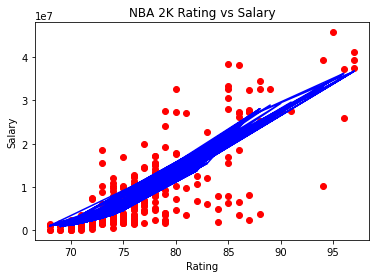

In [89]:
import matplotlib.pyplot as plt

plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
print(max(sc_y.inverse_transform(y_train)))
predicted_salaries = sc_y.inverse_transform(regressor.predict(X_train).reshape(-1,1))
plt.plot(sc_X.inverse_transform(X_train), predicted_salaries, color = 'blue')

plt.title('NBA 2K Rating vs Salary')
plt.xlabel('Rating')
plt.ylabel('Salary')
plt.show()

### Visualising the Test set results

In [ ]:
sf


# plt.scatter(X_test, y_test, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Salary vs Experience (Test set)')
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
# plt.show()